In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
from matplotlib import pyplot as plt
import pydicom
import os
import sys
import tqdm
print(os.listdir("../input"))


# Any results you write to the current directory are saved as output.

['siim-acr-pneumothorax-segmentation']


In [3]:
sys.path.insert(0, "../input/siim-acr-pneumothorax-segmentation/")
import mask_functions

In [4]:
sample_path = '../input/siim-acr-pneumothorax-segmentation/sample images'
dfRaw = pd.read_csv(sample_path + '/train-rle-sample.csv',header=None)
dfRaw.head(len(dfRaw))

,0,1
0,1.2.276.0.7230010.3.1.4.8323329.1000.151787516...,-1
1,1.2.276.0.7230010.3.1.4.8323329.10000.15178752...,-1
2,1.2.276.0.7230010.3.1.4.8323329.10001.15178752...,-1
3,1.2.276.0.7230010.3.1.4.8323329.10002.15178752...,-1
4,1.2.276.0.7230010.3.1.4.8323329.10003.15178752...,-1
5,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,175349 7 1013 12 1009 17 1005 19 1003 20 1002...
6,1.2.276.0.7230010.3.1.4.8323329.1314.151787516...,119331 47 972 82 937 107 912 122 897 137 882 ...
7,1.2.276.0.7230010.3.1.4.8323329.4440.151787518...,532609 13 1005 19 1002 21 999 25 989 32 988 3...
8,1.2.276.0.7230010.3.1.4.8323329.4982.151787518...,291062 6 1015 10 1013 11 1011 13 1010 13 1010...
9,1.2.276.0.7230010.3.1.4.8323329.12743.15178752...,810584 20 1003 22 1001 25 998 28 994 32 990 3...


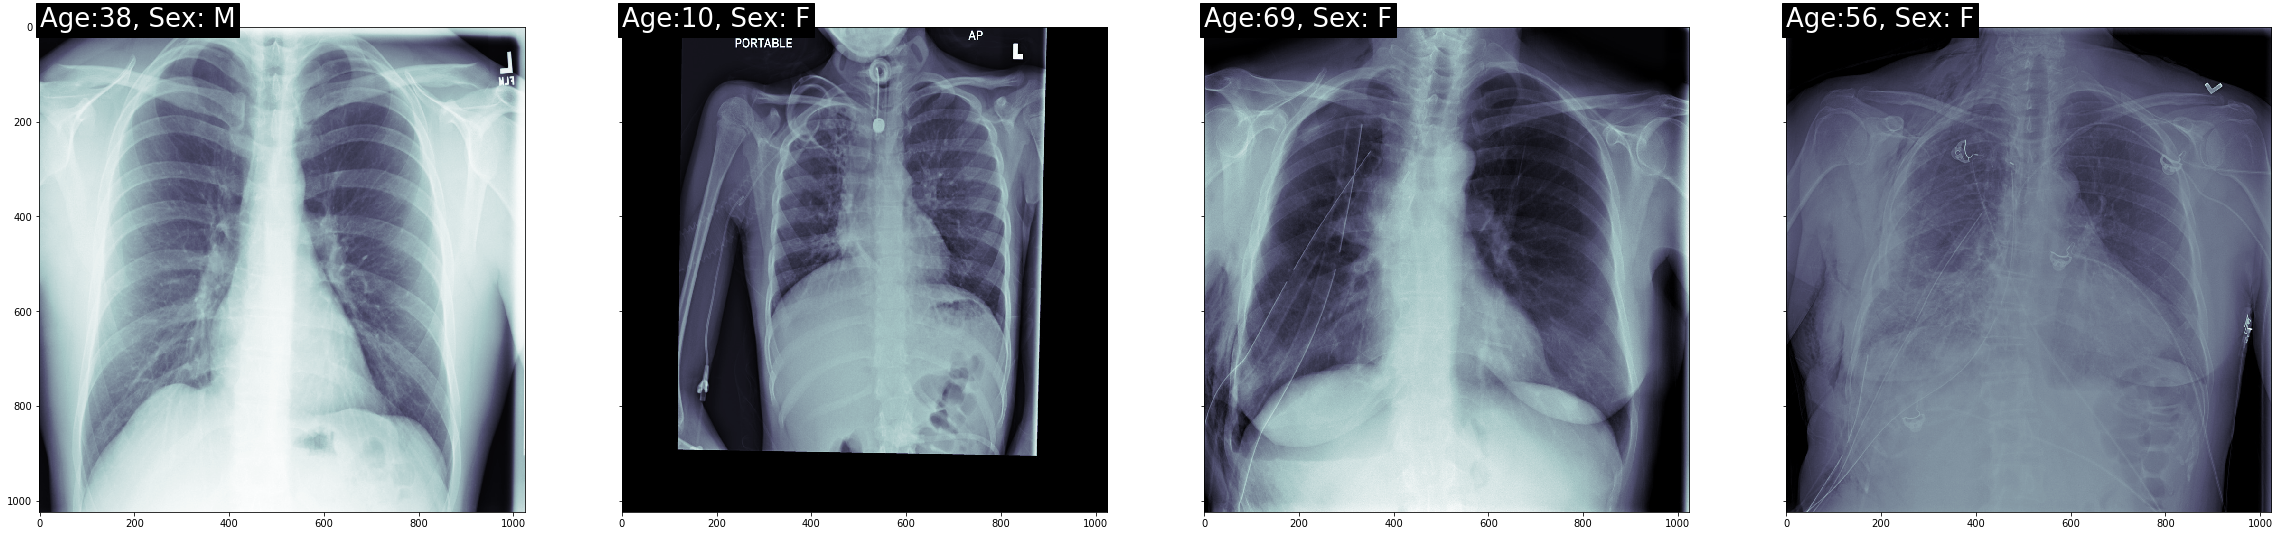

In [5]:
img_list = glob.glob('../input/siim-acr-pneumothorax-segmentation/sample images/*.dcm')
num_img =4
fig, ax = plt.subplots(nrows=1, ncols=num_img, sharey=True, figsize=(num_img*10,10))
img_part= img_list[:num_img//2]
for q, file_path in enumerate(img_list[:2]):
    dataset = pydicom.dcmread(file_path)
    ax[q].text(0,0,'Age:{}, Sex: {}'.format(dataset.PatientAge,dataset.PatientSex),
                           size=26,color='white', backgroundcolor='black')
    ax[q].imshow(dataset.pixel_array, cmap=plt.cm.bone)
for q, file_path in enumerate(img_list[-2:]):
    dataset = pydicom.dcmread(file_path)
    ax[num_img//2+q].text(0,0,'Age:{}, Sex: {}'.format(dataset.PatientAge,dataset.PatientSex),
                           size=26,color='white', backgroundcolor='black')
    ax[num_img//2+q].imshow(dataset.pixel_array, cmap=plt.cm.bone)

NameError: name 'rle2mask' is not defined

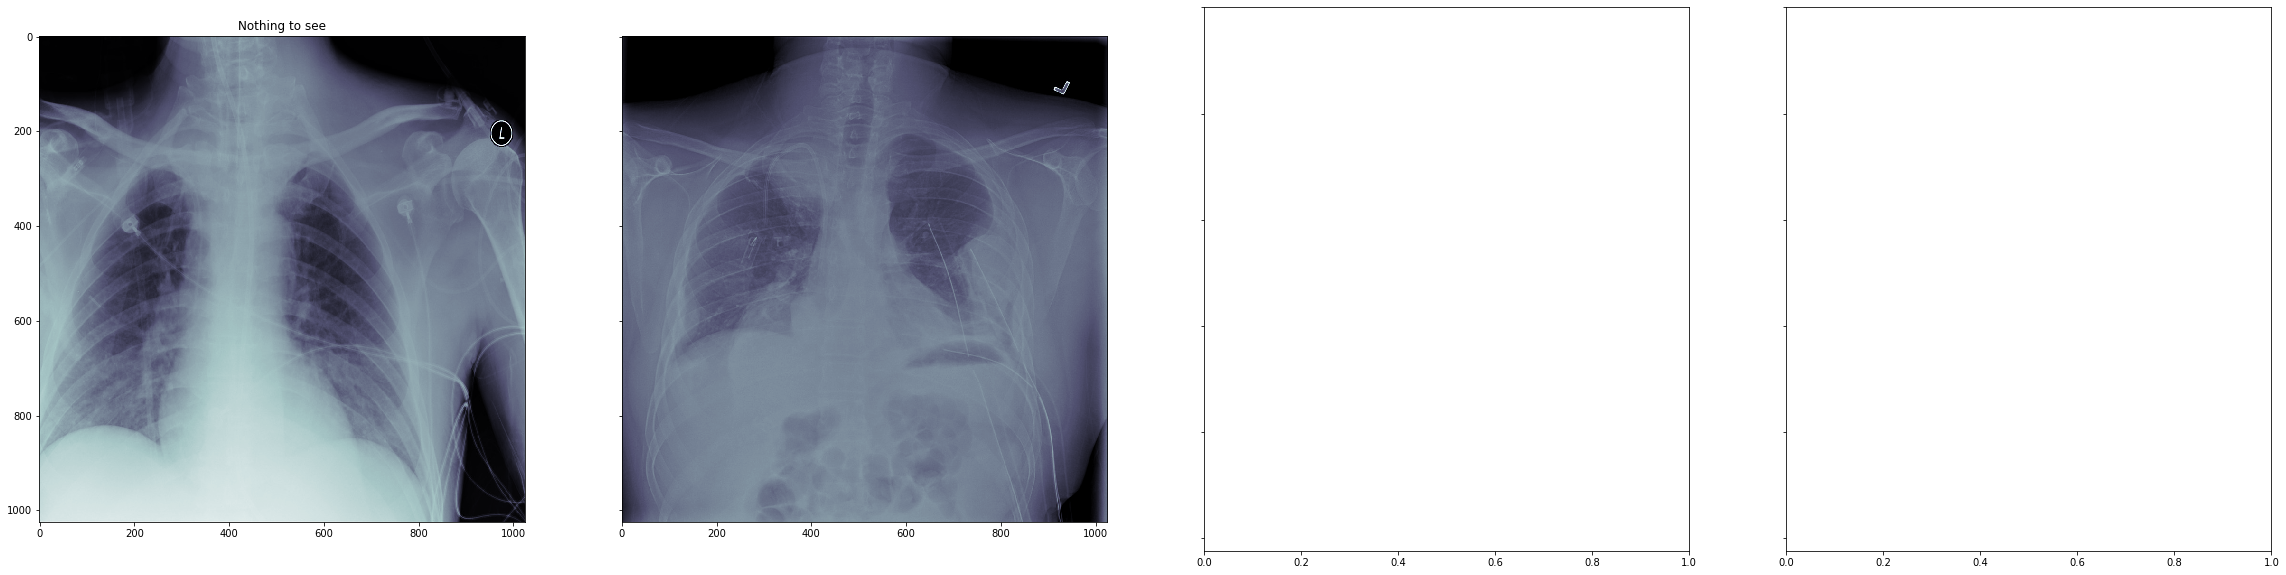

In [11]:
df = pd.read_csv('../input/siim-acr-pneumothorax-segmentation/sample images/train-rle-sample.csv', header=None, index_col=0)
start=4
fig, ax = plt.subplots(nrows=1, ncols=num_img, sharey=True, figsize=(num_img*10,10))
for q, file_path in enumerate(glob.glob('../input/siim-acr-pneumothorax-segmentation/sample images/*.dcm')[start:start+num_img]):
    dataset = pydicom.dcmread(file_path)
    #print(file_path.split('/')[-1][:-4])
    ax[q].imshow(dataset.pixel_array, cmap=plt.cm.bone)
    if df.loc[file_path.split('\\')[-1][:-4],1] != '-1':
        mask = rle2mask(df.loc[file_path.split('\\')[-1][:-4],1], 1024, 1024).T
        ax[q].set_title('See Marker')
        ax[q].imshow(mask, alpha=0.3, cmap="Reds")
    else:
        ax[q].set_title('Nothing to see')